In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

#### Data Exploration
<b>
- Mapping all the affected areas<br>
- Number of occurrences of earthquake with different magnitude ranges<br>
- Severity of an earthquake<br>
- Mapping Highly affected areas based on Magnitude<br>
- Correlation between Magnitude vs Depth<br>
- Which month has highest earthquake occurrences?<br>
- Which year has highest earthquake occurrences? </b>

#### Interesting Questions
<b>
- Is it possible to predict earthquake using mathematical models?<br>
- Can supermoon trigger earthquake? ( additional data?) <br>
- Is little earthquakes are precursor of big earthquakes?<br>
</b>

In [2]:
earth_quake = pd.read_csv("../input/database.csv")

In [3]:
earth_quake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
earth_quake.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [5]:
earth = earth_quake[["Date","Latitude","Longitude","Magnitude","Depth","Type"]]

In [6]:
earth.head()

,Date,Latitude,Longitude,Magnitude,Depth,Type
0,01/02/1965,19.246,145.616,6.0,131.6,Earthquake
1,01/04/1965,1.863,127.352,5.8,80.0,Earthquake
2,01/05/1965,-20.579,-173.972,6.2,20.0,Earthquake
3,01/08/1965,-59.076,-23.557,5.8,15.0,Earthquake
4,01/09/1965,11.938,126.427,5.8,15.0,Earthquake


In [7]:
earth.tail()

,Date,Latitude,Longitude,Magnitude,Depth,Type
23407,12/28/2016,38.3917,-118.8941,5.6,12.30,Earthquake
23408,12/28/2016,38.3777,-118.8957,5.5,8.80,Earthquake
23409,12/28/2016,36.9179,140.4262,5.9,10.00,Earthquake
23410,12/29/2016,-9.0283,118.6639,6.3,79.00,Earthquake
23411,12/30/2016,37.3973,141.4103,5.5,11.94,Earthquake


In [8]:
earth["Date"] = pd.to_datetime(earth["Date"])

In [9]:
earth.shape

(23412, 6)

In [10]:
earth.pivot_table(index = "Type", values = "Magnitude", aggfunc=len)

Type
Earthquake           23232.0
Explosion                4.0
Nuclear Explosion      175.0
Rock Burst               1.0
Name: Magnitude, dtype: float64

In [11]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

In [12]:
longitudes = earth["Longitude"].tolist()
latitudes = earth["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

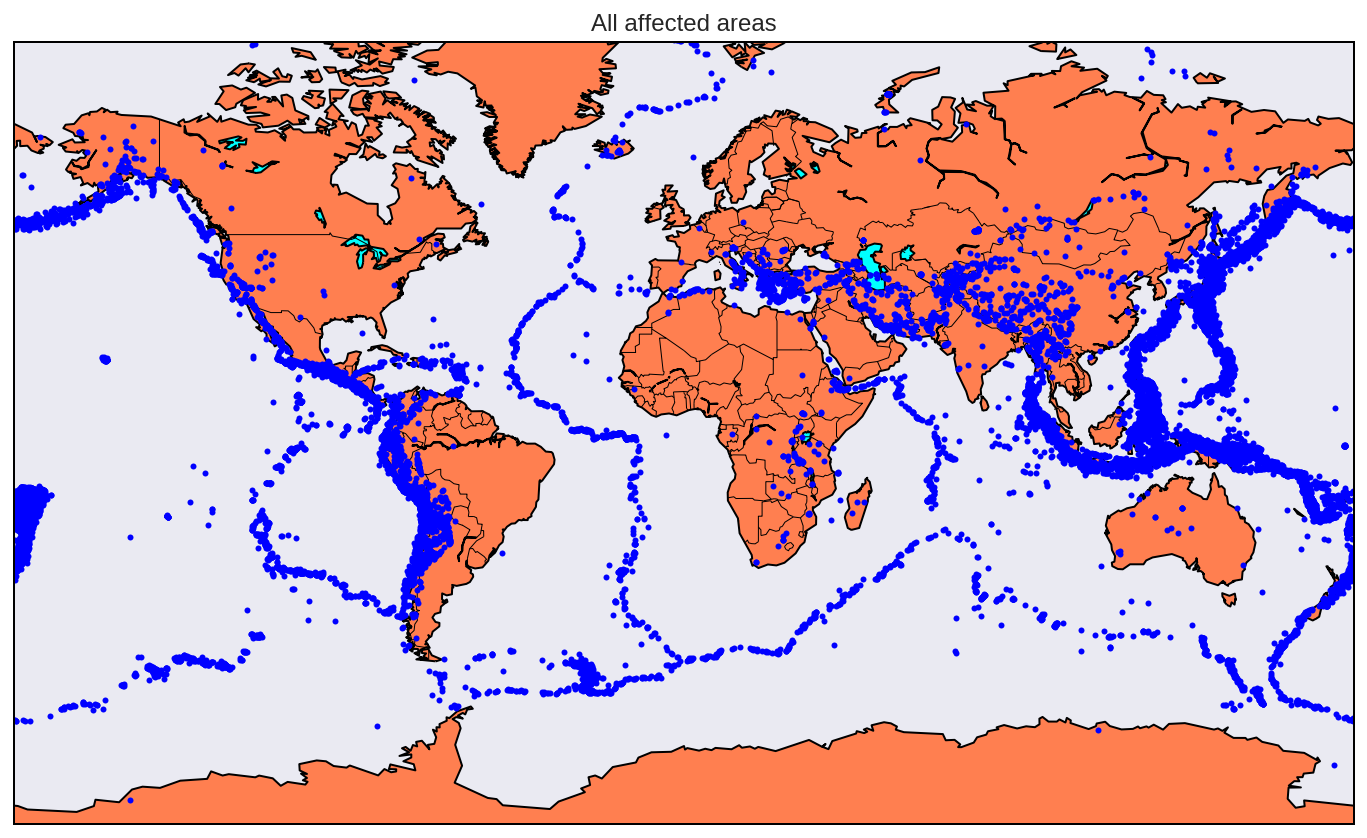

In [13]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 3, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [14]:
minimum = earth["Magnitude"].min()
maximum = earth["Magnitude"].max()
average = earth["Magnitude"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

Minimum: 5.5
Maximum: 9.1
Mean 5.882530753460003


Magnitude   Number of Occurence
5-6         16058.0
6-7         6616.0
7-8         698.0
8-9         38.0
9-10         2.0


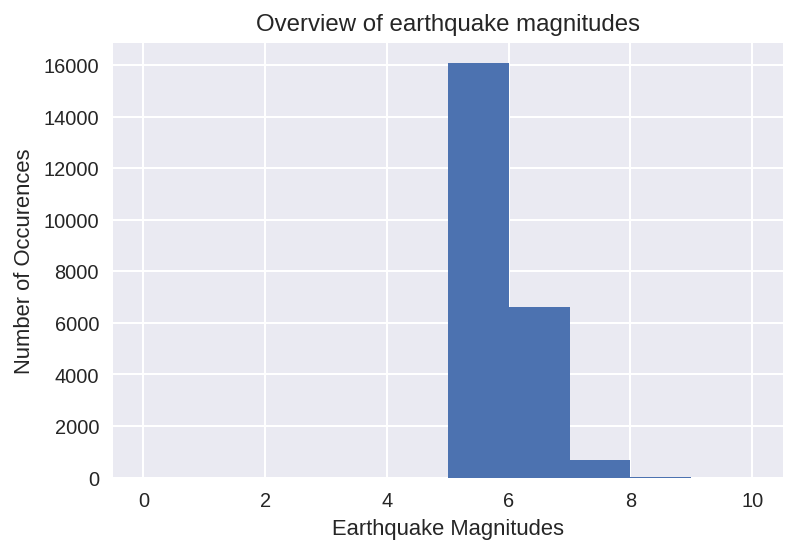

In [15]:
(n,bins, patches) = plt.hist(earth["Magnitude"], range=(0,10), bins=10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Number of Occurences")
plt.title("Overview of earthquake magnitudes")

print("Magnitude" +"   "+ "Number of Occurence")
for i in range(5, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

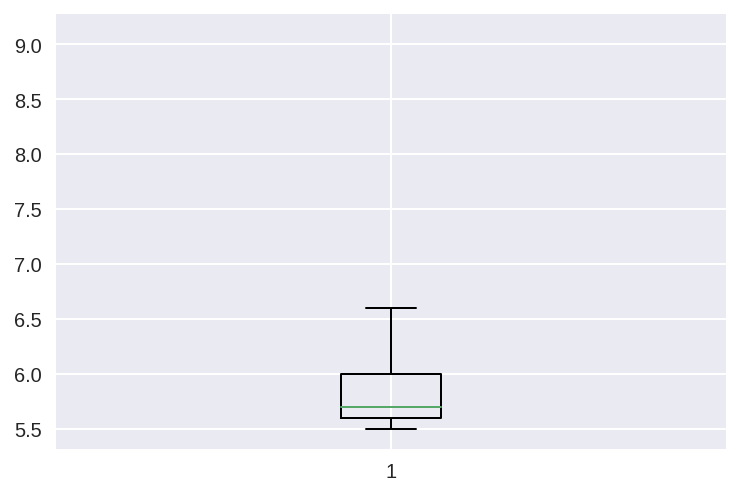

In [16]:
plt.boxplot(earth["Magnitude"])
plt.show()

In [17]:
highly_affected = earth[earth["Magnitude"]>=8]

In [18]:
print(highly_affected.shape)

(40, 6)


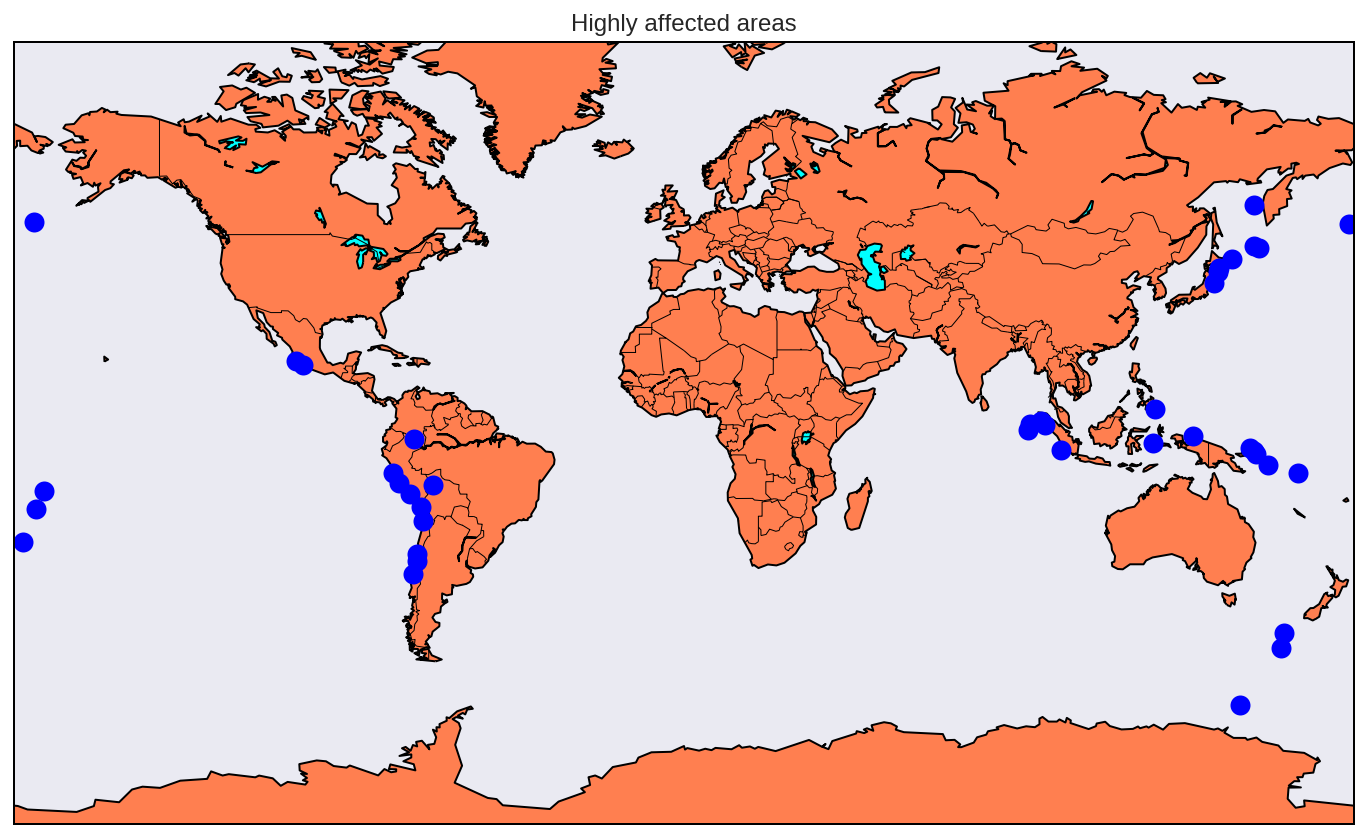

In [19]:
longitudes = highly_affected["Longitude"].tolist()
latitudes = highly_affected["Latitude"].tolist()
n = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
x,y = n(longitudes,latitudes)
fig3 = plt.figure(3,figsize=(12,10))
plt.title("Highly affected areas")
n.plot(x, y, "o", markersize = 10, color = 'blue')
n.drawcoastlines()
n.fillcontinents(color='coral',lake_color='aqua')
n.drawmapboundary()
n.drawcountries()
plt.show()

In [20]:
earth["Month"] = earth['Date'].dt.month

In [21]:
#month_occurrence = earth.pivot_table(index = "Month", values = ["Magnitude"] , aggfunc = )

month_occurrence = earth.groupby("Month").groups
print(len(month_occurrence[1]))

month = [i for i in range(1,13)]
occurrence = []

for i in range(len(month)):
    val = month_occurrence[month[i]]
    occurrence.append(len(val))

print(occurrence)
print(sum(occurrence))

1891
[1891, 1829, 2114, 1971, 1964, 1824, 1880, 2014, 1985, 1952, 1987, 2001]
23412


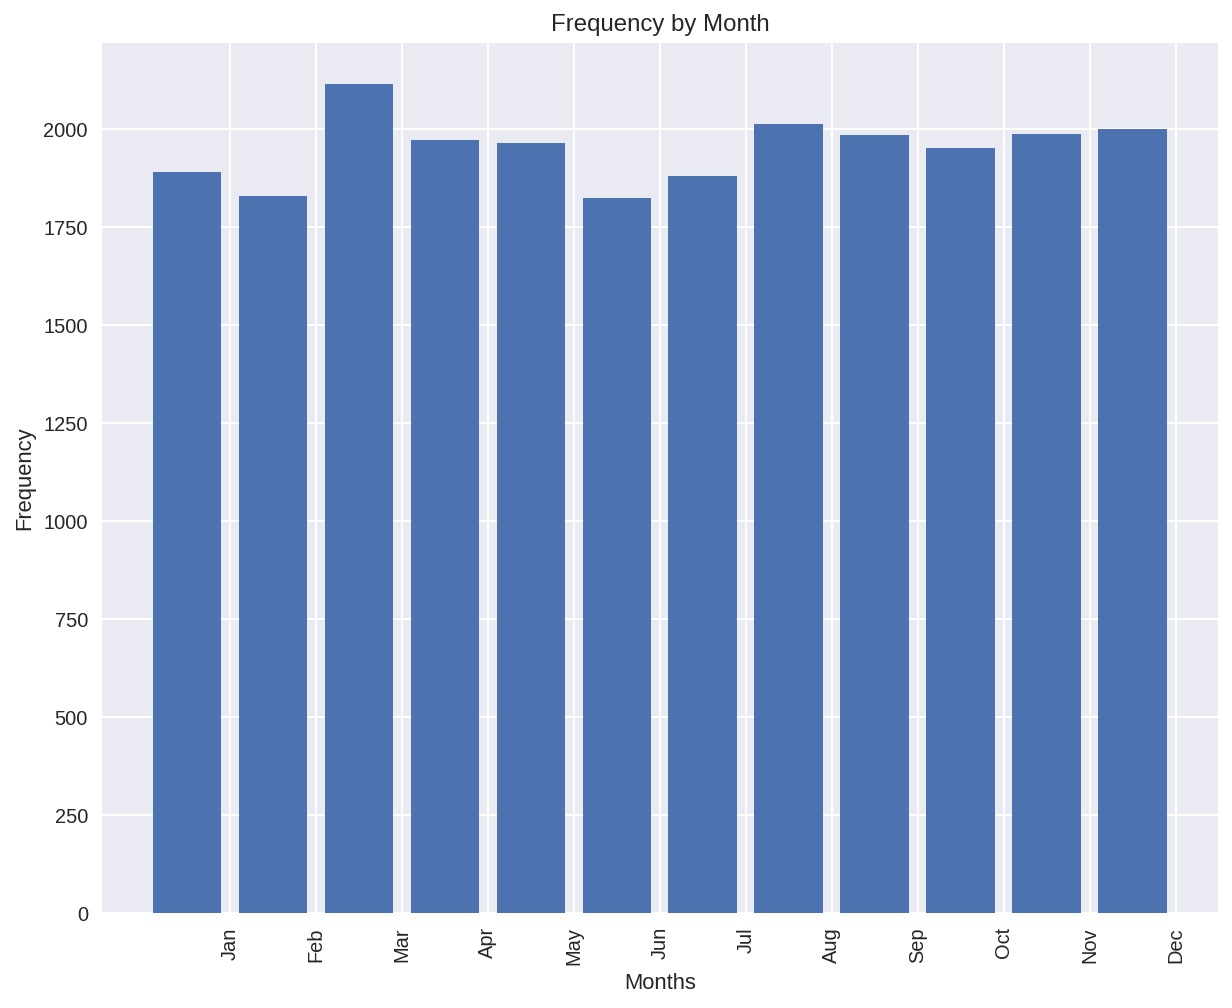

In [22]:
fig, ax = plt.subplots(figsize = (10,8))
bar_positions = np.arange(12) + 0.5

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
num_cols = months
bar_heights = occurrence

ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(1,13)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation = 90)
plt.title("Frequency by Month")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()

In [23]:
earth["Year"] = earth['Date'].dt.year

Maximum 713
Minimum 234


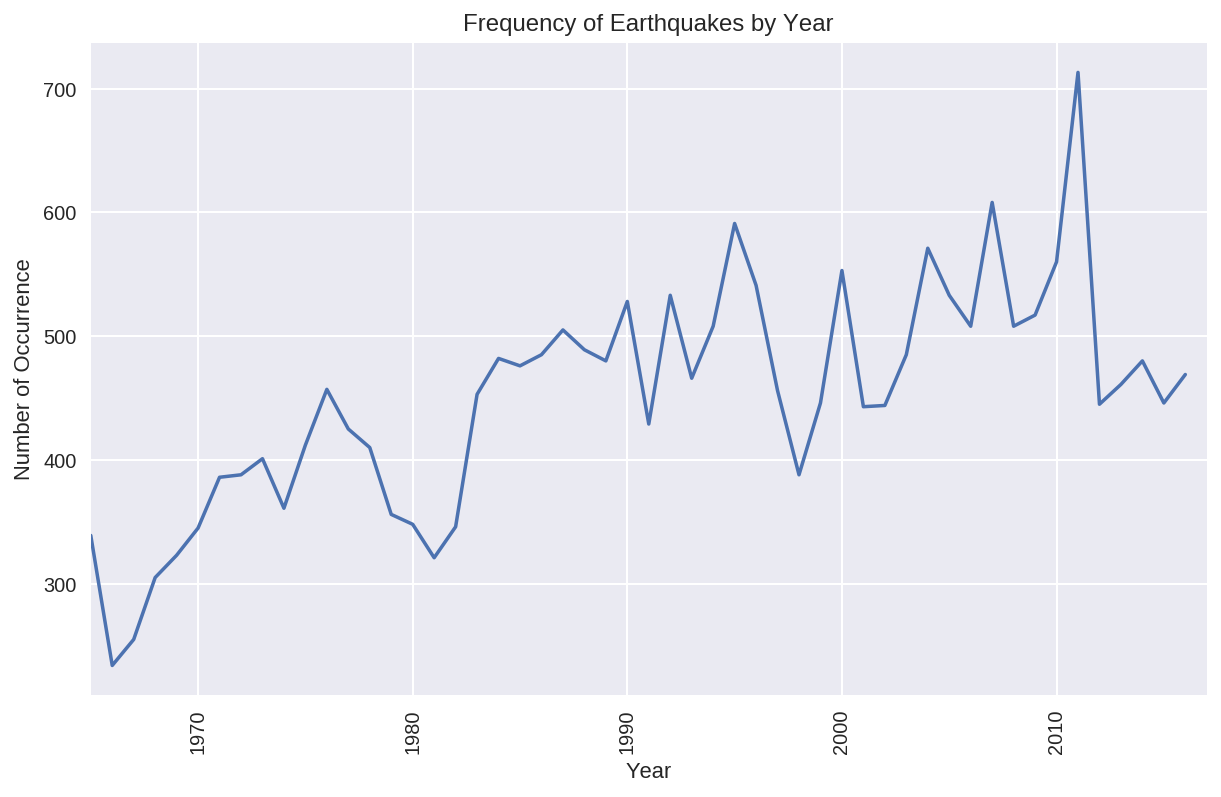

In [24]:
year_occurrence = earth.groupby("Year").groups


year = [i for i in range(1965,2017)]
occurrence = []

for i in range(len(year)):
    val = year_occurrence[year[i]]
    occurrence.append(len(val))

maximum = max(occurrence)
minimum = min(occurrence)
print("Maximum",maximum)
print("Minimum",minimum)

#print("Year :" + "     " +"Occurrence")

#for k,v in year_occurrence.items():
    #print(str(k) +"      "+ str(len(v)))

fig = plt.figure(figsize=(10,6))
plt.plot(year,occurrence)
plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Occurrence")
plt.title("Frequency of Earthquakes by Year")
plt.xlim(1965,2017)
plt.show()

### Is there any correlation between Depth vs Magnitude?

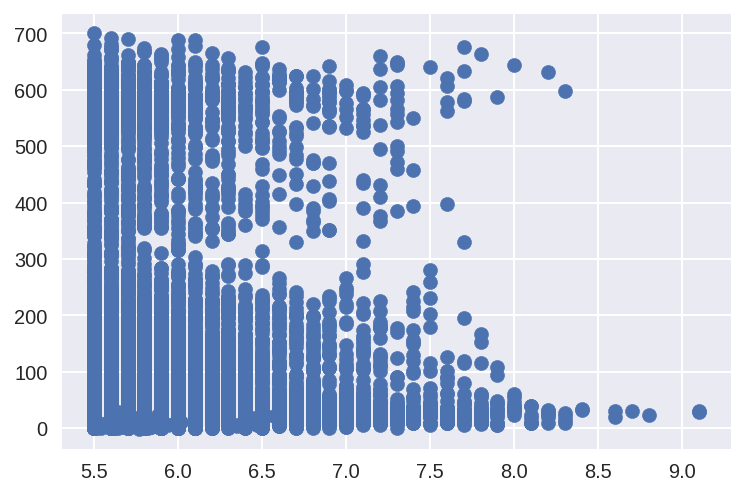

In [25]:
plt.scatter(earth["Magnitude"],earth["Depth"])

In [26]:
np.corrcoef(earth["Magnitude"], earth["Depth"])

array([[ 1.        ,  0.02345731],
       [ 0.02345731,  1.        ]])

In [27]:
supermoon_date = ["2016-11-14","2016-11-16","2016-11-15"]  #( one day before and after)
supermoon = earth[earth['Date'].isin(supermoon_date)]

supermoon

,Date,Latitude,Longitude,Magnitude,Depth,Type,Month,Year
23336,2016-11-14,-42.6058,173.2543,6.5,9.00,Earthquake,11,2016
23337,2016-11-14,51.0735,178.8402,5.6,34.26,Earthquake,11,2016
23338,2016-11-14,-42.3335,173.9064,5.7,12.00,Earthquake,11,2016
23339,2016-11-14,-41.7598,174.2992,5.5,17.21,Earthquake,11,2016
23340,2016-11-15,-41.7875,174.3064,5.5,10.00,Earthquake,11,2016
23341,2016-11-16,-20.2391,-173.0161,5.8,20.00,Earthquake,11,2016
23342,2016-11-16,-9.0027,113.2445,5.7,85.00,Earthquake,11,2016


In [28]:
OZMINLAT = -50     # (South East Cape Tasmania 43° 38' 40" S 146° 49' 30" E)
OZMAXLAT = -34   # (Boigu Island 09° 16' S 142° 13' E)
OZMINLON = 165 # (Steep point 26° 09' 5" S 113° 09' 18" E
OZMAXLON = 179   # (Cape Byron 28° 38' 15" S 153° 38' 14" E)
OZMIDLAT = -41
OZMIDLON = 172

m = Basemap(llcrnrlon=OZMINLON, llcrnrlat=OZMINLAT, 
    urcrnrlon=OZMAXLON, urcrnrlat=OZMAXLAT, resolution='i',
    lat_0=OZMIDLAT, lon_0=OZMIDLON, 
    area_thresh=100.,projection='lcc')

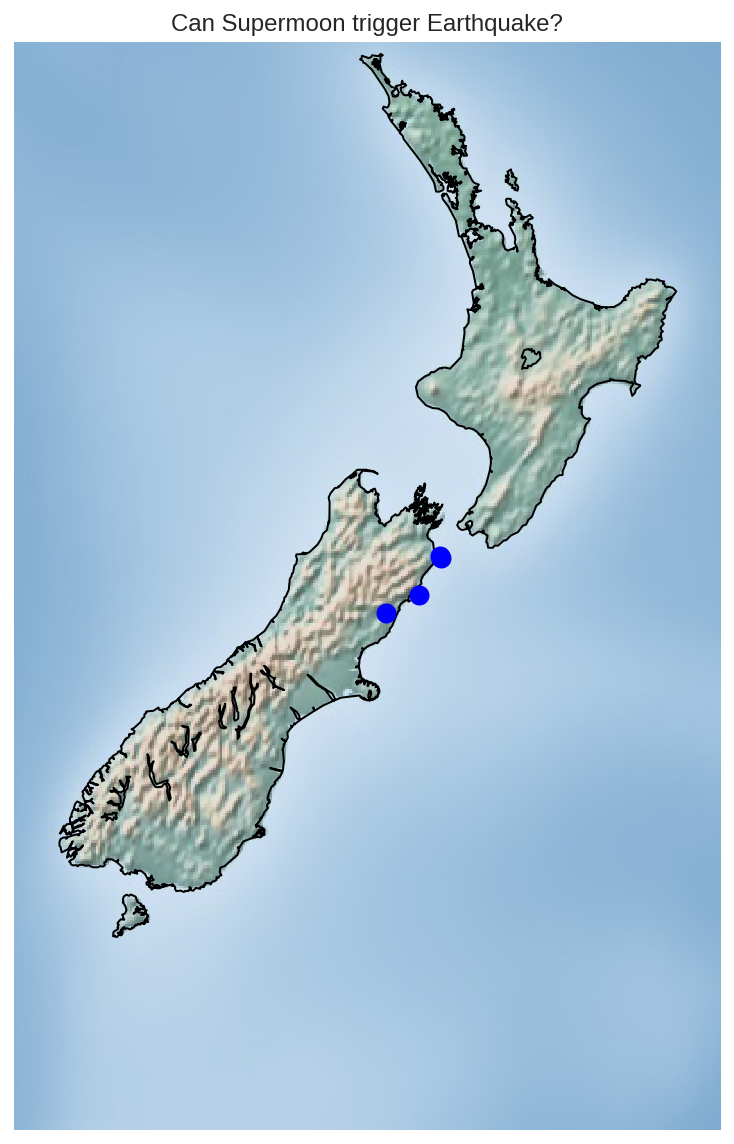

In [29]:
longitudes = supermoon["Longitude"].tolist()
latitudes = supermoon["Latitude"].tolist()
x,y = m(longitudes,latitudes)
fig2 = plt.figure(3,figsize=(12,10))
plt.title("Can Supermoon trigger Earthquake?")
m.plot(x, y, "o", markersize = 10, color = 'blue')
m.drawcoastlines()

m.shadedrelief()
plt.show()